# Pandas

The `numpy` module is excellent for numerical computations, but to handle missing data or arrays with mixed types takes more work. The `pandas` module is currently the most widely used tool for data manipulation, providing high-performance, easy-to-use data structures and advanced data analysis tools.

In particular `pandas` features:

* A fast and efficient "DataFrame" object for data manipulation with integrated indexing;
* Tools for reading and writing data between in-memory data structures and different formats (CSV, Excel, SQL, HDF5);
* Intelligent data alignment and integrated handling of missing data;
* Intelligent label-based slicing, fancy indexing, and subsetting of large data sets;
* Aggregating or transforming data with a powerful "group-by" engine; 
* High performance merging and joining of data sets;
* Hierarchical axis indexing provides an intuitive way of working with high-dimensional data in a lower-dimensional data structure;
* Time series-functionalities;
* Highly optimized for performance, with critical code paths written in Cython or C.


In [1]:
import pandas as pd
import numpy as np

## Series

Series are completely equivalent to 1D array but with axis labels and the possibility to store heterogeneous elements. Of paramount importance are the time-series, used to define time evolutions of a phenomenon. 


In [3]:
from string import ascii_lowercase as letters

# Creating a series, accessing indexes, values and values by their index 
xs = pd.Series(np.arange(10)*0.5, index=tuple(letters[:10])) # pd.Series(entity, label)
print (xs,'\n')
print (xs.index,'\n')
# Values of the Series are actually a numpy array
print (xs.values, type(xs.values),'\n')
print (xs['f'], xs.f, xs.h, '\n')
print (xs[['d', 'f', 'h']], '\n')

a    0.0
b    0.5
c    1.0
d    1.5
e    2.0
f    2.5
g    3.0
h    3.5
i    4.0
j    4.5
dtype: float64 

Index(['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j'], dtype='object') 

[ 0.   0.5  1.   1.5  2.   2.5  3.   3.5  4.   4.5] <class 'numpy.ndarray'> 

2.5 2.5 3.5 

d    1.5
f    2.5
h    3.5
dtype: float64 



In [4]:
# Extracting elements and operations: same as numpy array
print (xs[:3],'\n')
print (xs[7:], '\n')
print (xs[::3], '\n')
print (xs[xs>3], '\n')
print (np.exp(xs), '\n')
print (np.mean(xs), np.std(xs), '\n')

a    0.0
b    0.5
c    1.0
dtype: float64 

h    3.5
i    4.0
j    4.5
dtype: float64 

a    0.0
d    1.5
g    3.0
j    4.5
dtype: float64 

h    3.5
i    4.0
j    4.5
dtype: float64 

a     1.000000
b     1.648721
c     2.718282
d     4.481689
e     7.389056
f    12.182494
g    20.085537
h    33.115452
i    54.598150
j    90.017131
dtype: float64 

2.25 1.4361406616345072 



In [5]:
# Series can be created from python dictionary too.
# Not that the elements can be whatever!
d = {'b' : 1, 'a' : 'cat', 'c' : [2,3]}
pd.Series(d)



a       cat
b         1
c    [2, 3]
dtype: object

A key difference between Series and ndarray is that operations between Series automatically align the data based on label. Thus, you can write computations without giving consideration to whether the Series involved have the same labels.

In [12]:
s = pd.Series(np.random.randn(5), index=tuple(letters[:5]))
print(s, "\n")
print(s[1:], "\n")
print(s[:-1], "\n")
s[1:] + s[:-1]

a    1.828735
b   -0.682783
c   -0.205286
d   -1.493465
e   -0.431126
dtype: float64 

b   -0.682783
c   -0.205286
d   -1.493465
e   -0.431126
dtype: float64 

a    1.828735
b   -0.682783
c   -0.205286
d   -1.493465
dtype: float64 



a         NaN
b   -1.365565
c   -0.410572
d   -2.986929
e         NaN
dtype: float64

### Time series

Time series are very often used to profile the behaviour of a quantity as a function of time. Pandas as a special index for that, `DatetimeIndex`, that can be created e.g. with the function `pd.data_range()`

In [14]:
# to define a date, the datetime module is very useful
import datetime as dt
date = dt.date.today()
date = dt.datetime(2018,11,19,14,45,10,15)
print (date)

# otherwise, several notations are interpreted too
date = 'Nov 19 2018'
date = '19/11/2018 14:45:00'
print (date)

days = pd.date_range(date, periods=7, freq='D')
print (days)
# even user define frequencesa can be implemented

seconds = pd.date_range(date, periods=3600, freq='s')
print (seconds)


2018-11-19 14:45:10.000015
19/11/2018 14:45:00
DatetimeIndex(['2018-11-19 14:45:00', '2018-11-20 14:45:00',
               '2018-11-21 14:45:00', '2018-11-22 14:45:00',
               '2018-11-23 14:45:00', '2018-11-24 14:45:00',
               '2018-11-25 14:45:00'],
              dtype='datetime64[ns]', freq='D')
DatetimeIndex(['2018-11-19 14:45:00', '2018-11-19 14:45:01',
               '2018-11-19 14:45:02', '2018-11-19 14:45:03',
               '2018-11-19 14:45:04', '2018-11-19 14:45:05',
               '2018-11-19 14:45:06', '2018-11-19 14:45:07',
               '2018-11-19 14:45:08', '2018-11-19 14:45:09',
               ...
               '2018-11-19 15:44:50', '2018-11-19 15:44:51',
               '2018-11-19 15:44:52', '2018-11-19 15:44:53',
               '2018-11-19 15:44:54', '2018-11-19 15:44:55',
               '2018-11-19 15:44:56', '2018-11-19 15:44:57',
               '2018-11-19 15:44:58', '2018-11-19 15:44:59'],
              dtype='datetime64[ns]', length=3600, fr

To learn more about the frequency strings, please see this [link](http://pandas.pydata.org/pandas-docs/stable/timeseries.html#offset-aliases)


Timestamped data is the most basic type of time series data that associates values with points in time. For pandas objects it means using the points in time.

functions like `pd.to_datetime` can be used, for instance, when reading information as string from a dataset

In [15]:
# Timestamp = microseconds from 01/01/1970 00:00
tstamp = pd.Timestamp(dt.datetime(2018, 11, 19))

# internally it counts the nanoseconds from January 1st 1970
#tstamp = pd.Timestamp(dt.datetime(1970, 1, 1, 0, 0, 0, 1))
print(tstamp.value)

# when creating a timestamp the format can be explicitly passed
print (pd.to_datetime('2010/11/12', format='%Y/%m/%d'))
print (pd.to_datetime('12-11-2010 00:00', format='%d-%m-%Y %H:%M'))


1542585600000000000
2010-11-12 00:00:00
2010-11-12 00:00:00


A standard series can be created and (range of) elements can be used as indexes

In [17]:
tseries = pd.Series(np.random.normal(10, 1, len(days)), index=days)
# Extracting elements
print (tseries[0:4], '\n')
print (tseries['2018-11-19':'2018-11-21'], '\n') # Note - includes end time


2018-11-19 14:45:00    10.926859
2018-11-20 14:45:00     9.095064
2018-11-21 14:45:00    10.079529
2018-11-22 14:45:00     8.816043
Freq: D, dtype: float64 

2018-11-19 14:45:00    10.926859
2018-11-20 14:45:00     9.095064
2018-11-21 14:45:00    10.079529
Freq: D, dtype: float64 



`pd.to_datetime` can also be used to create a `DatetimeIndex`:

In [18]:
pd.to_datetime([1, 2, 3], unit='D', origin=pd.Timestamp('1980-02-03'))

DatetimeIndex(['1980-02-04', '1980-02-05', '1980-02-06'], dtype='datetime64[ns]', freq=None)

## DataFrame

A pandas DataFrame is like a simple tabular spreadsheet. For future reference (or for people already familiar with R), a pandas DataFrame is very similar to the R DataFrame.

Each column in a DataFrame is a Series object.

The element can be whatever, missing data are dealt with too (as NaN)

### DataFrame creation

A DataFrame can be created implicitly, with, e.g., a DatatimeIndex object as index:

In [23]:
entries=10
dates=pd.date_range('19/11/2018 14:45:00',freq='h', periods=entries)
df = pd.DataFrame(np.random.randn(entries,4), index=dates, columns=['A','B','C','D'])
df


,A,B,C,D
2018-11-19 14:45:00,0.668658,-0.052358,-0.275495,-0.251216
2018-11-19 15:45:00,0.270349,-2.263567,-0.723543,0.113471
2018-11-19 16:45:00,-1.163586,-0.127342,0.506094,1.732682
2018-11-19 17:45:00,1.229468,-1.138285,0.719702,0.757644
2018-11-19 18:45:00,-0.510597,-0.222017,2.699375,-2.705333
2018-11-19 19:45:00,-1.051426,-0.124869,-0.352964,1.902309
2018-11-19 20:45:00,1.242105,-1.525997,0.762834,0.375884
2018-11-19 21:45:00,0.464283,0.711841,-0.940992,-0.898006
2018-11-19 22:45:00,-0.083306,2.619690,-0.157330,0.700036
2018-11-19 23:45:00,-0.092413,0.123429,1.062745,-1.159884


or by means of a dictionary:


In [24]:
df2 = pd.DataFrame(
    { 'A' : 1.,
      'B' : pd.Timestamp('20130102'),
      'C' : pd.Series(1,index=range(4),dtype='float32'),
      'D' : np.arange(7,11),
      'E' : pd.Categorical(["test","train","test","train"]),
    }
    )
   

In [25]:
df2

,A,B,C,D,E
0,1.0,2013-01-02,1.0,7,test
1,1.0,2013-01-02,1.0,8,train
2,1.0,2013-01-02,1.0,9,test
3,1.0,2013-01-02,1.0,10,train


### Viewing Data

In [26]:
df.head()

,A,B,C,D
2018-11-19 14:45:00,0.668658,-0.052358,-0.275495,-0.251216
2018-11-19 15:45:00,0.270349,-2.263567,-0.723543,0.113471
2018-11-19 16:45:00,-1.163586,-0.127342,0.506094,1.732682
2018-11-19 17:45:00,1.229468,-1.138285,0.719702,0.757644
2018-11-19 18:45:00,-0.510597,-0.222017,2.699375,-2.705333


In [27]:
df.tail(4)

,A,B,C,D
2018-11-19 20:45:00,1.242105,-1.525997,0.762834,0.375884
2018-11-19 21:45:00,0.464283,0.711841,-0.940992,-0.898006
2018-11-19 22:45:00,-0.083306,2.619690,-0.157330,0.700036
2018-11-19 23:45:00,-0.092413,0.123429,1.062745,-1.159884


In [28]:
df.index

DatetimeIndex(['2018-11-19 14:45:00', '2018-11-19 15:45:00',
               '2018-11-19 16:45:00', '2018-11-19 17:45:00',
               '2018-11-19 18:45:00', '2018-11-19 19:45:00',
               '2018-11-19 20:45:00', '2018-11-19 21:45:00',
               '2018-11-19 22:45:00', '2018-11-19 23:45:00'],
              dtype='datetime64[ns]', freq='H')

In [29]:
df.columns

Index(['A', 'B', 'C', 'D'], dtype='object')

In [30]:
df.values

array([[ 0.66865764, -0.05235829, -0.27549535, -0.25121594],
       [ 0.27034933, -2.26356705, -0.72354286,  0.11347135],
       [-1.16358604, -0.12734174,  0.50609397,  1.73268186],
       [ 1.2294675 , -1.13828459,  0.71970243,  0.75764385],
       [-0.51059679, -0.22201708,  2.69937492, -2.70533314],
       [-1.05142623, -0.1248688 , -0.35296433,  1.90230891],
       [ 1.24210497, -1.52599701,  0.76283368,  0.37588359],
       [ 0.46428316,  0.71184052, -0.94099173, -0.89800613],
       [-0.08330637,  2.61968973, -0.15732953,  0.70003645],
       [-0.09241307,  0.12342936,  1.06274511, -1.15988392]])

In [31]:
df.describe()

,A,B,C,D
count,10.000000,10.000000,10.000000,10.000000
mean,0.097353,-0.199947,0.330043,0.056759
std,0.845314,1.325681,1.070670,1.388071
min,-1.163586,-2.263567,-0.940992,-2.705333
25%,-0.406051,-0.909218,-0.333597,-0.736309
50%,0.093521,-0.126105,0.174382,0.244677
75%,0.617564,0.079482,0.752051,0.743242
max,1.242105,2.619690,2.699375,1.902309


In [32]:
df.T

,2018-11-19 14:45:00,2018-11-19 15:45:00,2018-11-19 16:45:00,2018-11-19 17:45:00,2018-11-19 18:45:00,2018-11-19 19:45:00,2018-11-19 20:45:00,2018-11-19 21:45:00,2018-11-19 22:45:00,2018-11-19 23:45:00
A,0.668658,0.270349,-1.163586,1.229468,-0.510597,-1.051426,1.242105,0.464283,-0.083306,-0.092413
B,-0.052358,-2.263567,-0.127342,-1.138285,-0.222017,-0.124869,-1.525997,0.711841,2.619690,0.123429
C,-0.275495,-0.723543,0.506094,0.719702,2.699375,-0.352964,0.762834,-0.940992,-0.157330,1.062745
D,-0.251216,0.113471,1.732682,0.757644,-2.705333,1.902309,0.375884,-0.898006,0.700036,-1.159884


In [35]:
df.sort_index(axis=1,ascending=False) # axis=0 -> sort throw rows
                                      # axis=1 -> sort throw columns

,D,C,B,A
2018-11-19 14:45:00,-0.251216,-0.275495,-0.052358,0.668658
2018-11-19 15:45:00,0.113471,-0.723543,-2.263567,0.270349
2018-11-19 16:45:00,1.732682,0.506094,-0.127342,-1.163586
2018-11-19 17:45:00,0.757644,0.719702,-1.138285,1.229468
2018-11-19 18:45:00,-2.705333,2.699375,-0.222017,-0.510597
2018-11-19 19:45:00,1.902309,-0.352964,-0.124869,-1.051426
2018-11-19 20:45:00,0.375884,0.762834,-1.525997,1.242105
2018-11-19 21:45:00,-0.898006,-0.940992,0.711841,0.464283
2018-11-19 22:45:00,0.700036,-0.157330,2.619690,-0.083306
2018-11-19 23:45:00,-1.159884,1.062745,0.123429,-0.092413


In [36]:
df.sort_values(by="C")

,A,B,C,D
2018-11-19 21:45:00,0.464283,0.711841,-0.940992,-0.898006
2018-11-19 15:45:00,0.270349,-2.263567,-0.723543,0.113471
2018-11-19 19:45:00,-1.051426,-0.124869,-0.352964,1.902309
2018-11-19 14:45:00,0.668658,-0.052358,-0.275495,-0.251216
2018-11-19 22:45:00,-0.083306,2.619690,-0.157330,0.700036
2018-11-19 16:45:00,-1.163586,-0.127342,0.506094,1.732682
2018-11-19 17:45:00,1.229468,-1.138285,0.719702,0.757644
2018-11-19 20:45:00,1.242105,-1.525997,0.762834,0.375884
2018-11-19 23:45:00,-0.092413,0.123429,1.062745,-1.159884
2018-11-19 18:45:00,-0.510597,-0.222017,2.699375,-2.705333


## Selection

### Getting slices

The following show how to get part of the DataFrame (i.e. not just the elements)

In [37]:
## standard and safe
print (df['A'],'\n')

## equivalent but dangerous (imagine blank spaces in the name of the column..)
print (df.A)

2018-11-19 14:45:00    0.668658
2018-11-19 15:45:00    0.270349
2018-11-19 16:45:00   -1.163586
2018-11-19 17:45:00    1.229468
2018-11-19 18:45:00   -0.510597
2018-11-19 19:45:00   -1.051426
2018-11-19 20:45:00    1.242105
2018-11-19 21:45:00    0.464283
2018-11-19 22:45:00   -0.083306
2018-11-19 23:45:00   -0.092413
Freq: H, Name: A, dtype: float64 

2018-11-19 14:45:00    0.668658
2018-11-19 15:45:00    0.270349
2018-11-19 16:45:00   -1.163586
2018-11-19 17:45:00    1.229468
2018-11-19 18:45:00   -0.510597
2018-11-19 19:45:00   -1.051426
2018-11-19 20:45:00    1.242105
2018-11-19 21:45:00    0.464283
2018-11-19 22:45:00   -0.083306
2018-11-19 23:45:00   -0.092413
Freq: H, Name: A, dtype: float64


In [38]:
# selecting rows by counting
print (df[0:3])

# or by index
print (df["2018-11-19 14:45:00":"2018-11-19 16:45:00"])

                            A         B         C         D
2018-11-19 14:45:00  0.668658 -0.052358 -0.275495 -0.251216
2018-11-19 15:45:00  0.270349 -2.263567 -0.723543  0.113471
2018-11-19 16:45:00 -1.163586 -0.127342  0.506094  1.732682
                            A         B         C         D
2018-11-19 14:45:00  0.668658 -0.052358 -0.275495 -0.251216
2018-11-19 15:45:00  0.270349 -2.263567 -0.723543  0.113471
2018-11-19 16:45:00 -1.163586 -0.127342  0.506094  1.732682


### Selection by label

In [40]:
# getting a cross section (part of the DataFrame) using a label
df.loc[dates[0]]

A    0.668658
B   -0.052358
C   -0.275495
D   -0.251216
Name: 2018-11-19 14:45:00, dtype: float64

In [41]:
# selecting on a multi-axis by label:
df.loc[:,['A','B']]

,A,B
2018-11-19 14:45:00,0.668658,-0.052358
2018-11-19 15:45:00,0.270349,-2.263567
2018-11-19 16:45:00,-1.163586,-0.127342
2018-11-19 17:45:00,1.229468,-1.138285
2018-11-19 18:45:00,-0.510597,-0.222017
2018-11-19 19:45:00,-1.051426,-0.124869
2018-11-19 20:45:00,1.242105,-1.525997
2018-11-19 21:45:00,0.464283,0.711841
2018-11-19 22:45:00,-0.083306,2.619690
2018-11-19 23:45:00,-0.092413,0.123429


In [42]:
# showing label slicing, both endpoints are included:
df.loc['2018-11-19 18:45:00':'2018-11-19 20:45:00',['A','B']]

,A,B
2018-11-19 18:45:00,-0.510597,-0.222017
2018-11-19 19:45:00,-1.051426,-0.124869
2018-11-19 20:45:00,1.242105,-1.525997


In [43]:
# getting an individual element
print (df.loc[dates[1],'A'])

# equivalently
print (df.at[dates[1],'A'])

0.270349330093
0.270349330093


### Selecting by position

In [44]:
# select via the position of the passed integers:
print (df.iloc[3],'\n')

# notation similar to numpy/python
print (df.iloc[3:5,0:2])

A    1.229468
B   -1.138285
C    0.719702
D    0.757644
Name: 2018-11-19 17:45:00, dtype: float64 

                            A         B
2018-11-19 17:45:00  1.229468 -1.138285
2018-11-19 18:45:00 -0.510597 -0.222017


In [45]:
# selecting raws 1,2 and 4 for columns 0 and 2
df.iloc[[1,2,4],[0,2]]

,A,C
2018-11-19 15:45:00,0.270349,-0.723543
2018-11-19 16:45:00,-1.163586,0.506094
2018-11-19 18:45:00,-0.510597,2.699375


In [46]:
# slicing rows explicitly
print (df.iloc[1:3,:],'\n')

# slicing columns explicitly
print (df.iloc[:,1:3])


                            A         B         C         D
2018-11-19 15:45:00  0.270349 -2.263567 -0.723543  0.113471
2018-11-19 16:45:00 -1.163586 -0.127342  0.506094  1.732682 

                            B         C
2018-11-19 14:45:00 -0.052358 -0.275495
2018-11-19 15:45:00 -2.263567 -0.723543
2018-11-19 16:45:00 -0.127342  0.506094
2018-11-19 17:45:00 -1.138285  0.719702
2018-11-19 18:45:00 -0.222017  2.699375
2018-11-19 19:45:00 -0.124869 -0.352964
2018-11-19 20:45:00 -1.525997  0.762834
2018-11-19 21:45:00  0.711841 -0.940992
2018-11-19 22:45:00  2.619690 -0.157330
2018-11-19 23:45:00  0.123429  1.062745


In [47]:
# selecting an individual element by position
df.iloc[1,1]
df.iat[1,1]


-2.2635670524607066

### Boolean index

Very powerful way of filtering out data with certain features. Notation is very similar to numpy arrays.

In [48]:
# Filter by a boolean condition on the values of a single column
df[df['B'] > 0]

,A,B,C,D
2018-11-19 21:45:00,0.464283,0.711841,-0.940992,-0.898006
2018-11-19 22:45:00,-0.083306,2.619690,-0.157330,0.700036
2018-11-19 23:45:00,-0.092413,0.123429,1.062745,-1.159884


In [49]:
# Selecting on the basis of boolean conditions applied to the whole DataFrame
df[df>0]

# a DataFrame with the same shape is returned, with NaN's where condition is not met

,A,B,C,D
2018-11-19 14:45:00,0.668658,NaN,NaN,NaN
2018-11-19 15:45:00,0.270349,NaN,NaN,0.113471
2018-11-19 16:45:00,NaN,NaN,0.506094,1.732682
2018-11-19 17:45:00,1.229468,NaN,0.719702,0.757644
2018-11-19 18:45:00,NaN,NaN,2.699375,NaN
2018-11-19 19:45:00,NaN,NaN,NaN,1.902309
2018-11-19 20:45:00,1.242105,NaN,0.762834,0.375884
2018-11-19 21:45:00,0.464283,0.711841,NaN,NaN
2018-11-19 22:45:00,NaN,2.619690,NaN,0.700036
2018-11-19 23:45:00,NaN,0.123429,1.062745,NaN


### Setting

Combination of selection and setting of values

In [50]:
# setting values by label (same as by position)
df.at[dates[0],'A'] = 0

# setting and assigning a numpy array
df.loc[:,'D'] = np.array([5] * len(df))

# defining a brend new column
df['E'] = np.arange(len(df))*0.5

# defining a brend new column by means of a pd.Series: indexes must be the same!
df['E prime'] = pd.Series(np.arange(len(df))*2, index=df.index)


In [51]:
def dcos(theta):
    theta = theta*(np.pi/180)
    return np.cos(theta)
 
df['cosine'] = pd.Series(df["E"].apply(dcos), index=df.index)
df

,A,B,C,D,E,E prime,cosine
2018-11-19 14:45:00,0.000000,-0.052358,-0.275495,5,0.0,0,1.000000
2018-11-19 15:45:00,0.270349,-2.263567,-0.723543,5,0.5,2,0.999962
2018-11-19 16:45:00,-1.163586,-0.127342,0.506094,5,1.0,4,0.999848
2018-11-19 17:45:00,1.229468,-1.138285,0.719702,5,1.5,6,0.999657
2018-11-19 18:45:00,-0.510597,-0.222017,2.699375,5,2.0,8,0.999391
2018-11-19 19:45:00,-1.051426,-0.124869,-0.352964,5,2.5,10,0.999048
2018-11-19 20:45:00,1.242105,-1.525997,0.762834,5,3.0,12,0.998630
2018-11-19 21:45:00,0.464283,0.711841,-0.940992,5,3.5,14,0.998135
2018-11-19 22:45:00,-0.083306,2.619690,-0.157330,5,4.0,16,0.997564
2018-11-19 23:45:00,-0.092413,0.123429,1.062745,5,4.5,18,0.996917


In [52]:
# another example of global setting
df2=df.copy()
df2[df2>0] = -df2
df2

,A,B,C,D,E,E prime,cosine
2018-11-19 14:45:00,0.000000,-0.052358,-0.275495,-5,0.0,0,-1.000000
2018-11-19 15:45:00,-0.270349,-2.263567,-0.723543,-5,-0.5,-2,-0.999962
2018-11-19 16:45:00,-1.163586,-0.127342,-0.506094,-5,-1.0,-4,-0.999848
2018-11-19 17:45:00,-1.229468,-1.138285,-0.719702,-5,-1.5,-6,-0.999657
2018-11-19 18:45:00,-0.510597,-0.222017,-2.699375,-5,-2.0,-8,-0.999391
2018-11-19 19:45:00,-1.051426,-0.124869,-0.352964,-5,-2.5,-10,-0.999048
2018-11-19 20:45:00,-1.242105,-1.525997,-0.762834,-5,-3.0,-12,-0.998630
2018-11-19 21:45:00,-0.464283,-0.711841,-0.940992,-5,-3.5,-14,-0.998135
2018-11-19 22:45:00,-0.083306,-2.619690,-0.157330,-5,-4.0,-16,-0.997564
2018-11-19 23:45:00,-0.092413,-0.123429,-1.062745,-5,-4.5,-18,-0.996917


### Dropping

N.B.: dropping doesn't act permanently on the DataFrame, i.e. to get that do :
```python
df = df.drop(....)
```

In [56]:
# Dropping by column
df.drop(['E prime'], axis=1)

#which is equivalent to
#df.drop(columns=['E prime'])

,A,B,C,D,E,cosine
2018-11-19 14:45:00,0.000000,-0.052358,-0.275495,5,0.0,1.000000
2018-11-19 15:45:00,0.270349,-2.263567,-0.723543,5,0.5,0.999962
2018-11-19 16:45:00,-1.163586,-0.127342,0.506094,5,1.0,0.999848
2018-11-19 17:45:00,1.229468,-1.138285,0.719702,5,1.5,0.999657
2018-11-19 18:45:00,-0.510597,-0.222017,2.699375,5,2.0,0.999391
2018-11-19 19:45:00,-1.051426,-0.124869,-0.352964,5,2.5,0.999048
2018-11-19 20:45:00,1.242105,-1.525997,0.762834,5,3.0,0.998630
2018-11-19 21:45:00,0.464283,0.711841,-0.940992,5,3.5,0.998135
2018-11-19 22:45:00,-0.083306,2.619690,-0.157330,5,4.0,0.997564
2018-11-19 23:45:00,-0.092413,0.123429,1.062745,5,4.5,0.996917


In [57]:
# Dropping by raws
# save and always working
df.drop(df.index[[1,2,3,4]])

,A,B,C,D,E,E prime,cosine
2018-11-19 14:45:00,0.000000,-0.052358,-0.275495,5,0.0,0,1.000000
2018-11-19 19:45:00,-1.051426,-0.124869,-0.352964,5,2.5,10,0.999048
2018-11-19 20:45:00,1.242105,-1.525997,0.762834,5,3.0,12,0.998630
2018-11-19 21:45:00,0.464283,0.711841,-0.940992,5,3.5,14,0.998135
2018-11-19 22:45:00,-0.083306,2.619690,-0.157330,5,4.0,16,0.997564
2018-11-19 23:45:00,-0.092413,0.123429,1.062745,5,4.5,18,0.996917


In [58]:
# something like df.drop('index_name') 
# would work but the type of index must be specificed, 
# in particular with DatetimeIndex
df.drop(pd.to_datetime("2018-11-19 22:45:00"))

,A,B,C,D,E,E prime,cosine
2018-11-19 14:45:00,0.000000,-0.052358,-0.275495,5,0.0,0,1.000000
2018-11-19 15:45:00,0.270349,-2.263567,-0.723543,5,0.5,2,0.999962
2018-11-19 16:45:00,-1.163586,-0.127342,0.506094,5,1.0,4,0.999848
2018-11-19 17:45:00,1.229468,-1.138285,0.719702,5,1.5,6,0.999657
2018-11-19 18:45:00,-0.510597,-0.222017,2.699375,5,2.0,8,0.999391
2018-11-19 19:45:00,-1.051426,-0.124869,-0.352964,5,2.5,10,0.999048
2018-11-19 20:45:00,1.242105,-1.525997,0.762834,5,3.0,12,0.998630
2018-11-19 21:45:00,0.464283,0.711841,-0.940992,5,3.5,14,0.998135
2018-11-19 23:45:00,-0.092413,0.123429,1.062745,5,4.5,18,0.996917


## Missing data

pandas primarily uses the value np.nan to represent missing data. It is by default not included in computations.

In [59]:
df_wNan = df[df>0]
df_wNan

,A,B,C,D,E,E prime,cosine
2018-11-19 14:45:00,NaN,NaN,NaN,5,NaN,NaN,1.000000
2018-11-19 15:45:00,0.270349,NaN,NaN,5,0.5,2.0,0.999962
2018-11-19 16:45:00,NaN,NaN,0.506094,5,1.0,4.0,0.999848
2018-11-19 17:45:00,1.229468,NaN,0.719702,5,1.5,6.0,0.999657
2018-11-19 18:45:00,NaN,NaN,2.699375,5,2.0,8.0,0.999391
2018-11-19 19:45:00,NaN,NaN,NaN,5,2.5,10.0,0.999048
2018-11-19 20:45:00,1.242105,NaN,0.762834,5,3.0,12.0,0.998630
2018-11-19 21:45:00,0.464283,0.711841,NaN,5,3.5,14.0,0.998135
2018-11-19 22:45:00,NaN,2.619690,NaN,5,4.0,16.0,0.997564
2018-11-19 23:45:00,NaN,0.123429,1.062745,5,4.5,18.0,0.996917


In [67]:
# dropping raws with at least a Nan
df_wNan.dropna(how='any')

,A,B,C,D,E,E prime,cosine


In [68]:
# getting a mask
df_wNan.isna()
df_wNan.notna()

AttributeError: 'DataFrame' object has no attribute 'notna'

In [69]:
# filling missing data
df_wNan.fillna(value=0)

,A,B,C,D,E,E prime,cosine
2018-11-19 14:45:00,0.000000,0.000000,0.000000,5,0.0,0.0,1.000000
2018-11-19 15:45:00,0.270349,0.000000,0.000000,5,0.5,2.0,0.999962
2018-11-19 16:45:00,0.000000,0.000000,0.506094,5,1.0,4.0,0.999848
2018-11-19 17:45:00,1.229468,0.000000,0.719702,5,1.5,6.0,0.999657
2018-11-19 18:45:00,0.000000,0.000000,2.699375,5,2.0,8.0,0.999391
2018-11-19 19:45:00,0.000000,0.000000,0.000000,5,2.5,10.0,0.999048
2018-11-19 20:45:00,1.242105,0.000000,0.762834,5,3.0,12.0,0.998630
2018-11-19 21:45:00,0.464283,0.711841,0.000000,5,3.5,14.0,0.998135
2018-11-19 22:45:00,0.000000,2.619690,0.000000,5,4.0,16.0,0.997564
2018-11-19 23:45:00,0.000000,0.123429,1.062745,5,4.5,18.0,0.996917


Fill gaps forward or backward by propagating non-NA values forward or backward:

In [70]:
df_wNan.fillna(method='pad')

,A,B,C,D,E,E prime,cosine
2018-11-19 14:45:00,NaN,NaN,NaN,5,NaN,NaN,1.000000
2018-11-19 15:45:00,0.270349,NaN,NaN,5,0.5,2.0,0.999962
2018-11-19 16:45:00,0.270349,NaN,0.506094,5,1.0,4.0,0.999848
2018-11-19 17:45:00,1.229468,NaN,0.719702,5,1.5,6.0,0.999657
2018-11-19 18:45:00,1.229468,NaN,2.699375,5,2.0,8.0,0.999391
2018-11-19 19:45:00,1.229468,NaN,2.699375,5,2.5,10.0,0.999048
2018-11-19 20:45:00,1.242105,NaN,0.762834,5,3.0,12.0,0.998630
2018-11-19 21:45:00,0.464283,0.711841,0.762834,5,3.5,14.0,0.998135
2018-11-19 22:45:00,0.464283,2.619690,0.762834,5,4.0,16.0,0.997564
2018-11-19 23:45:00,0.464283,0.123429,1.062745,5,4.5,18.0,0.996917


## Operations

Here comes the most relevant advantage of DataFrame. Operations on columns are extremly fast, almost as fast as the actual operation between elements in a raw

In [71]:
# Some statistics (mean() just as an example)
# raws
print (df.mean(axis=0),'\n')
# columns
print (df.mean(axis=1),'\n')

A          0.030488
B         -0.199947
C          0.330043
D          5.000000
E          2.250000
E prime    9.000000
cosine     0.998915
dtype: float64 

2018-11-19 14:45:00    0.810307
2018-11-19 15:45:00    0.826172
2018-11-19 16:45:00    1.459288
2018-11-19 17:45:00    2.044363
2018-11-19 18:45:00    2.566593
2018-11-19 19:45:00    2.424256
2018-11-19 20:45:00    3.068224
2018-11-19 21:45:00    3.390467
2018-11-19 22:45:00    4.053803
2018-11-19 23:45:00    4.227240
Freq: H, dtype: float64 



In [72]:
# global operations on columns
df.apply(np.cumsum)

,A,B,C,D,E,E prime,cosine
2018-11-19 14:45:00,0.000000,-0.052358,-0.275495,5,0.0,0,1.000000
2018-11-19 15:45:00,0.270349,-2.315925,-0.999038,10,0.5,2,1.999962
2018-11-19 16:45:00,-0.893237,-2.443267,-0.492944,15,1.5,6,2.999810
2018-11-19 17:45:00,0.336231,-3.581552,0.226758,20,3.0,12,3.999467
2018-11-19 18:45:00,-0.174366,-3.803569,2.926133,25,5.0,20,4.998858
2018-11-19 19:45:00,-1.225792,-3.928438,2.573169,30,7.5,30,5.997906
2018-11-19 20:45:00,0.016313,-5.454435,3.336002,35,10.5,42,6.996536
2018-11-19 21:45:00,0.480596,-4.742594,2.395011,40,14.0,56,7.994670
2018-11-19 22:45:00,0.397290,-2.122904,2.237681,45,18.0,72,8.992234
2018-11-19 23:45:00,0.304876,-1.999475,3.300426,50,22.5,90,9.989152


In [73]:
df.apply(lambda x: x.max() - x.min())

A           2.405691
B           4.883257
C           3.640367
D           0.000000
E           4.500000
E prime    18.000000
cosine      0.003083
dtype: float64

In [74]:
# syntax is as usual similar to that of numpy arrays
df['A']+df['B']

2018-11-19 14:45:00   -0.052358
2018-11-19 15:45:00   -1.993218
2018-11-19 16:45:00   -1.290928
2018-11-19 17:45:00    0.091183
2018-11-19 18:45:00   -0.732614
2018-11-19 19:45:00   -1.176295
2018-11-19 20:45:00   -0.283892
2018-11-19 21:45:00    1.176124
2018-11-19 22:45:00    2.536383
2018-11-19 23:45:00    0.031016
Freq: H, dtype: float64

Let's play it hard and load (in memory) a (relatively) large dataset

In [75]:
file_name="/home/agostini/data/data_000637.txt"
data=pd.read_csv(file_name)
data

,HEAD,FPGA,TDC_CHANNEL,ORBIT_CNT,BX_COUNTER,TDC_MEAS
0,1,0,123,3869200167,2374,26
1,1,0,124,3869200167,2374,27
2,1,0,63,3869200167,2553,28
3,1,0,64,3869200167,2558,19
4,1,0,64,3869200167,2760,25
5,1,0,63,3869200167,2762,4
6,1,0,61,3869200167,2772,14
7,1,0,139,3869200167,2776,0
8,1,0,62,3869200167,2774,21
9,1,0,60,3869200167,2788,7


Let's know do some operations among (elements of) columns

In [76]:
# the one-liner killing it all
data['timens']=data['TDC_MEAS']*25/30+data['BX_COUNTER']*25

In [ ]:
# the old slooow way
def conversion(data):
    result=[]
    for i in range(len(data)): 
        result.append(data.loc[data.index[i],'TDC_MEAS']*25/30.+data.loc[data.index[i],'BX_COUNTER']*25)
    return result

data['timens']=conversion(data)

In [77]:
data

,HEAD,FPGA,TDC_CHANNEL,ORBIT_CNT,BX_COUNTER,TDC_MEAS,timens
0,1,0,123,3869200167,2374,26,59371.666667
1,1,0,124,3869200167,2374,27,59372.500000
2,1,0,63,3869200167,2553,28,63848.333333
3,1,0,64,3869200167,2558,19,63965.833333
4,1,0,64,3869200167,2760,25,69020.833333
5,1,0,63,3869200167,2762,4,69053.333333
6,1,0,61,3869200167,2772,14,69311.666667
7,1,0,139,3869200167,2776,0,69400.000000
8,1,0,62,3869200167,2774,21,69367.500000
9,1,0,60,3869200167,2788,7,69705.833333


## Merge

pandas provides various facilities for easily combining together Series, DataFrame, and Panel objects with various kinds of set logic for the indexes and relational algebra functionality in the case of join / merge-type operations.

### Concat

concatenation (adding raws) is straightforward


In [78]:
rdf = pd.DataFrame(np.random.randn(10, 4))
rdf

,0,1,2,3
0,-1.704426,-0.922531,0.309511,-1.116575
1,0.802488,1.352729,0.874129,-0.069957
2,1.823935,-0.802915,-0.743413,0.734539
3,-0.765878,0.084699,-0.090792,0.750012
4,0.272920,-1.283855,-0.090712,0.286134
5,-0.222994,1.184104,0.481241,-1.599984
6,-0.106013,-0.258762,-0.306139,0.830884
7,-1.064771,-0.164274,-0.357075,0.625426
8,-0.170957,-0.259188,-2.026638,0.199128
9,0.177081,1.452926,2.734030,-0.760197


In [79]:
# divide it into pieaces raw-wise
pieces = [rdf[:3], rdf[3:7], rdf[7:]]
pieces

[          0         1         2         3
 0 -1.704426 -0.922531  0.309511 -1.116575
 1  0.802488  1.352729  0.874129 -0.069957
 2  1.823935 -0.802915 -0.743413  0.734539,
           0         1         2         3
 3 -0.765878  0.084699 -0.090792  0.750012
 4  0.272920 -1.283855 -0.090712  0.286134
 5 -0.222994  1.184104  0.481241 -1.599984
 6 -0.106013 -0.258762 -0.306139  0.830884,
           0         1         2         3
 7 -1.064771 -0.164274 -0.357075  0.625426
 8 -0.170957 -0.259188 -2.026638  0.199128
 9  0.177081  1.452926  2.734030 -0.760197]

In [80]:
# put it back together
pd.concat(pieces)

# indexes can be ignored
#pd.concat(pieces, ignore_index=True)

# in case of dimension mismatch, Nan are added where needed

,0,1,2,3
0,-1.704426,-0.922531,0.309511,-1.116575
1,0.802488,1.352729,0.874129,-0.069957
2,1.823935,-0.802915,-0.743413,0.734539
3,-0.765878,0.084699,-0.090792,0.750012
4,0.272920,-1.283855,-0.090712,0.286134
5,-0.222994,1.184104,0.481241,-1.599984
6,-0.106013,-0.258762,-0.306139,0.830884
7,-1.064771,-0.164274,-0.357075,0.625426
8,-0.170957,-0.259188,-2.026638,0.199128
9,0.177081,1.452926,2.734030,-0.760197


In [81]:
# appending a single raw (as a Series)
s = rdf.iloc[3]
rdf.append(s, ignore_index=True)


,0,1,2,3
0,-1.704426,-0.922531,0.309511,-1.116575
1,0.802488,1.352729,0.874129,-0.069957
2,1.823935,-0.802915,-0.743413,0.734539
3,-0.765878,0.084699,-0.090792,0.750012
4,0.272920,-1.283855,-0.090712,0.286134
5,-0.222994,1.184104,0.481241,-1.599984
6,-0.106013,-0.258762,-0.306139,0.830884
7,-1.064771,-0.164274,-0.357075,0.625426
8,-0.170957,-0.259188,-2.026638,0.199128
9,0.177081,1.452926,2.734030,-0.760197


### Merge/Join

SQL like operations on table can be performed on DataFrames. This is all rather sophisticated, refer to the [doc](https://pandas.pydata.org/pandas-docs/stable/merging.html#merging) for more info/examples

In [82]:
left = pd.DataFrame({'key': ['foo', 'bar'], 'lval': [1, 2]})
right = pd.DataFrame({'key': ['foo', 'bar'], 'rval': [4, 5]})

pd.merge(left,right,on="key")

,key,lval,rval
0,foo,1,4
1,bar,2,5


## Grouping

By “group by” we are referring to a process involving one or more of the following steps:

* Splitting the data into groups based on some criteria
* Applying a function to each group independently
* Combining the results into a data structure


In [83]:
gdf = pd.DataFrame({'A' : ['foo', 'bar', 'foo', 'bar',
                          'foo', 'bar', 'foo', 'foo'],
                    'B' : ['one', 'one', 'two', 'three',
                           'two', 'two', 'one', 'three'],
                    'C' : np.random.randn(8),
                    'D' : np.random.randn(8)})
gdf

,A,B,C,D
0,foo,one,0.188920,1.430413
1,bar,one,-0.067082,-0.209417
2,foo,two,-0.672439,-0.920391
3,bar,three,-0.426228,0.653738
4,foo,two,-0.339184,-1.456247
5,bar,two,-0.317675,-0.071018
6,foo,one,0.312579,0.699656
7,foo,three,1.069703,-0.157132


In [84]:
# Grouping and then applying the sum() 
# function to the resulting groups (effective only where number are there).
gdf.groupby('A').sum()

,C,D
A,,
bar,-0.810985,0.373303
foo,0.559579,-0.403702


## Multi-indexing


Hierarchical / Multi-level indexing allows sophisticated data analysis on higher dimensional data. In essence, it enables you to store and manipulate data with an arbitrary number of dimensions in lower dimensional data structures like Series (1d) and DataFrame (2d).

In [86]:
tuples = list(zip(['bar', 'bar', 'baz', 'baz', 'foo', 'foo', 'qux', 'qux'],
          ['one', 'two', 'one', 'two', 'one', 'two', 'one', 'two']))
multi_index = pd.MultiIndex.from_tuples(tuples, names=['first', 'second'])
print (multi_index,'\n')

s = pd.Series(np.random.randn(8), index=multi_index)
print (s)


MultiIndex(levels=[['bar', 'baz', 'foo', 'qux'], ['one', 'two']],
           labels=[[0, 0, 1, 1, 2, 2, 3, 3], [0, 1, 0, 1, 0, 1, 0, 1]],
           names=['first', 'second']) 

first  second
bar    one       0.451505
       two       2.056398
baz    one       0.242181
       two       1.239023
foo    one      -3.198178
       two      -0.587051
qux    one      -0.751899
       two       0.165173
dtype: float64


In [87]:
# it enables further features of the groupby method,
# e.g. when group-by by multiple columns
gdf.groupby(['A','B']).sum()

C         D
A   B                        
bar one   -0.067082 -0.209417
    three -0.426228  0.653738
    two   -0.317675 -0.071018
foo one    0.501499  2.130069
    three  1.069703 -0.157132
    two   -1.011623 -2.376639

In [88]:
# stack() method “compresses” a level in the DataFrame’s columns
gdf.groupby(['A','B']).sum().stack()

A    B       
bar  one    C   -0.067082
            D   -0.209417
     three  C   -0.426228
            D    0.653738
     two    C   -0.317675
            D   -0.071018
foo  one    C    0.501499
            D    2.130069
     three  C    1.069703
            D   -0.157132
     two    C   -1.011623
            D   -2.376639
dtype: float64

## Plotting

Just a preview, more on the next lab class!

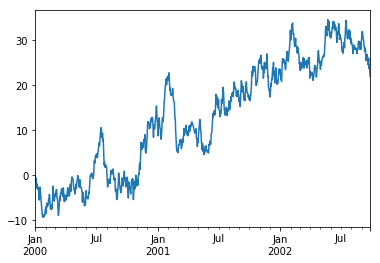

In [91]:
%matplotlib inline
ts = pd.Series(np.random.randn(1000), index=pd.date_range('1/1/2000', periods=1000))
ts.cumsum().plot()

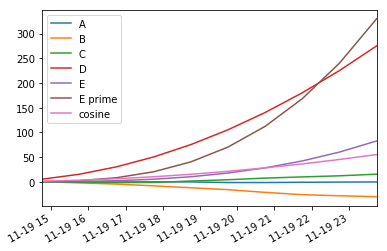

In [92]:
import matplotlib.pyplot as plt
pdf=pd.DataFrame(np.random.randn(1000, 4), index=ts.index,columns=['A', 'B', 'C', 'D'])
df = df.cumsum()
plt.figure(); df.plot(); plt.legend(loc='best')